# Brain Tumor Prediction and Treatment Analysis

## Introduction 
The National Brain Tumor Society reports that about 1 million Americans are living with a brain tumor with an estimated 90,000 more to receive a primary brain tumor diagnosis in the following year. There are more than 100 distinct types of primary brain tumors, each with its own spectrum of presentations, treatments, and outcomes. More than any other cancer, brain tumors can have lasting and life-altering physical, cognitive, and psychological impacts on a patient’s life.

Our study addresses three research questions that aim to understand characteristics of brain tumor diagnosis and treatment to help reveal (if any) patterns of brain tumor presentation, to support diagnosis and treatment. Our analysis aims to understand the frequency and distribution of brain tumors within the studied population. 

1. Does tumor size differ significantly between benign and malignant tumors?
2. What is the relationship between treatment modalities (radiation, surgery, chemotherapy) and patient survival rates?
3. Can the first symptom presented predict the stage of the tumor at its discovery?

The dataset utilized in this analysis was retrieved from Kaggle https://www.kaggle.com/datasets/miadul/brain-tumor-dataset. The data consists of simulated medical repositories comprising of 20,000 synthetic patient records. While the data is simulated, its breadth reflects a variety of medical scenarios, incorporating diverse patient demographics, tumor attributes, and clinical outcomes.

## Importing Packages 

In [17]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import statistics
import datetime
import seaborn as sns
%matplotlib inline

## Data wrangling - Refining, Grouping, and Shaping for Analysis
To prepare the data for analysis, the following steps were performed: 
- Rounded numbers in "Tumor_Size" column, for ease of mathematical manipulation   
- Created a smaller dataframe "brain_tumor_dataset_3" containing variables of interest 
- Converted MRI results to 0 and 1 (Negative and Positive) 
- Converted "Stage" to integer values (1, 2, 3, 4) 
- Converted "Gender" to 1 and 2 (Male and Female)
- Converted the three treatment columns (Radiation_Treatment, Surgery_Performed, and Chemotherapy) to 0 and 1 (No/Yes)

The relevant columns used in the analysis include: 
1. Gender: Gender of the patient (Male/Female).
2. Tumor_Type: Type of tumor (Benign/Malignant).
3. Tumor_Size: Size of the tumor in centimeters.
4. Stage: The stage of the tumor (I, II, III, IV).
5. Symptom_1: The first symptom observed (e.g., Headache, Seizures).
6. Symptom_2: The second symptom observed.
7. Symptom_3: The third symptom observed.
8. Radiation_Treatment: Whether radiation treatment was administered (Yes/No).
9. Surgery_Performed: Whether surgery was performed (Yes/No).
10. Chemotherapy: Whether chemotherapy was administered (Yes/No).
11. Survival_Rate: The estimated survival rate of the patient (percentage).
12. MRI_Result: The result of the MRI scan (Positive/Negative).

## Question 1. Tumor Size Differentiation and Survival Rate

### Visualizing the data

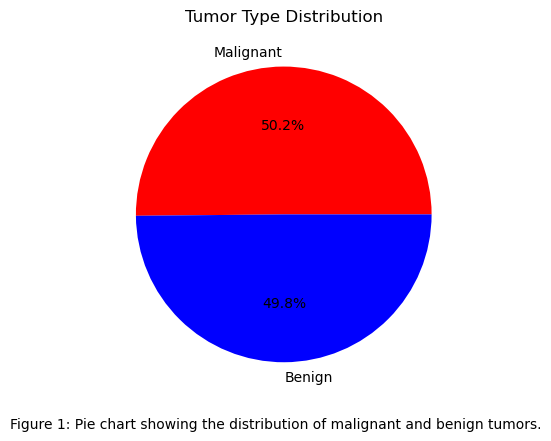

In [18]:
# Select relevant columns for question 1
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type", 
"Symptom_1", "Stage", "Radiation_Treatment", "Surgery_Performed", 
"Chemotherapy", "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_3 = brain_tumor_dataset_2[["Tumor_Size", 
                                               "Tumor_Type"]].copy()
brain_tumor_dataset_3.loc[:, "Tumor_Size"] = brain_tumor_dataset_3["Tumor_Size"].round(2)

# Plot pie chart, add relevant details to chart, show chart
malignant_count = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Malignant"].shape[0]
benign_count = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Benign"].shape[0]
tumor_type_counts = [malignant_count, benign_count]
tumor_type_counts
tumor_type_name = ["Malignant", "Benign"]
plt.pie(tumor_type_counts, autopct='%1.1f%%',labels = tumor_type_name, 
        colors = ["Red", "Blue"]);
plt.title("Tumor Type Distribution");
plt.figtext(0.5, 0.05, "Figure 1: Pie chart showing the distribution of malignant and benign tumors.", 
            ha='center', fontsize=10);

In [19]:
# Creating statistic of interest
brain_tumor_dataset_4 = brain_tumor_dataset_1[["Tumor_Size", "Survival_Rate"]].copy()

mean_survival_rate = brain_tumor_dataset_4.groupby("Tumor_Size").agg("mean")

obs_stat = mean_survival_rate.loc[mean_survival_rate.index >= 6, "Survival_Rate"].mean() - mean_survival_rate.loc[mean_survival_rate.index < 6, "Survival_Rate"].mean()
print(obs_stat)

0.17664576460464332


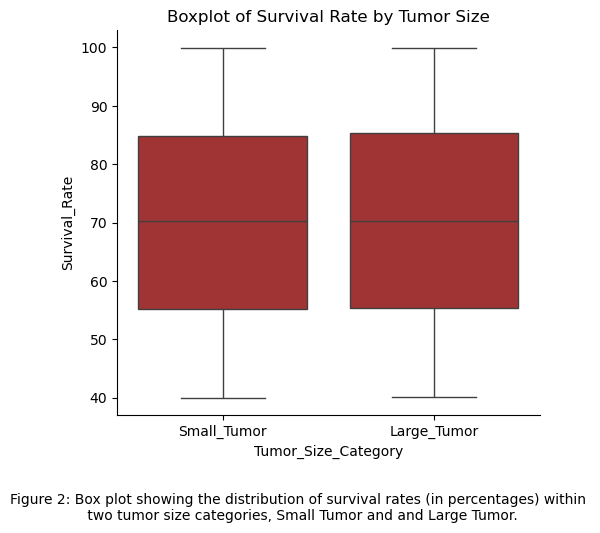

In [20]:
# Visualizing the small and large tumors in boxplot, add titles and caption
brain_tumor_dataset_4["Tumor_Size_Category"] = ["Small_Tumor" if size < 6 else "Large_Tumor" 
                                                for size in brain_tumor_dataset_4["Tumor_Size"]]
sns.catplot(data = brain_tumor_dataset_4, 
            x = "Tumor_Size_Category", 
            y = "Survival_Rate",
            color = "firebrick",
            kind = "box");
plt.title("Boxplot of Survival Rate by Tumor Size");
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, -0.01, "Figure 2: Box plot showing the distribution of survival rates (in percentages) within \n two tumor size categories, Small Tumor and and Large Tumor.", 
            ha='center', fontsize=10);

*Note that to determine the baseline for large tumors, we referenced https://link.springer.com/article/10.1007/s10143-018-01071-3, which cites literature on the range (in cm) of large-sized tumors, specifically glioblastoma (a common malignant brain tumor).

### Analyzing the data - Hypothesis Testing, Scatterplot with Regression Line, and Descriptive Statistical Analysis

#### Hypothesis Testing

Null hypothesis: The average survival rate is the same for any size tumor. 

Alternative hypothesis: On average, patients with larger tumors have a lower survival rate than those with smaller tumors.

$H_0: \mu_L - \mu_S = 0$ 

$H_A: \mu_L - \mu_S > 0$

In [21]:
#Creating null distribution 
def mean_diff(brain_tumor_data):
    mean_survival_rate = brain_tumor_data.groupby("Tumor_Size")["Survival_Rate"].mean()
    small_tumor_mean = mean_survival_rate[mean_survival_rate.index < 6].mean()
    large_tumor_mean = mean_survival_rate[mean_survival_rate.index >= 6].mean()
    obs_stat = large_tumor_mean - small_tumor_mean
    return obs_stat

mean_diff(brain_tumor_dataset_4)

np.float64(0.17664576460464332)

In [22]:
brain_tumor_dataset_shuff = brain_tumor_dataset_4.copy()
brain_tumor_dataset_shuff["Tumor_Size"] = np.random.permutation(brain_tumor_dataset_4["Tumor_Size"])

mean_diff(brain_tumor_dataset_shuff)

np.float64(-0.13541061043393654)

In [23]:
null_dist = []

for i in range(10000):  
    brain_tumor_dataset_shuff["Tumor_Size"] = np.random.permutation(brain_tumor_dataset_4["Tumor_Size"])
    shuff_stat = mean_diff(brain_tumor_dataset_shuff)
    null_dist.append(shuff_stat)

print(len(null_dist))

10000


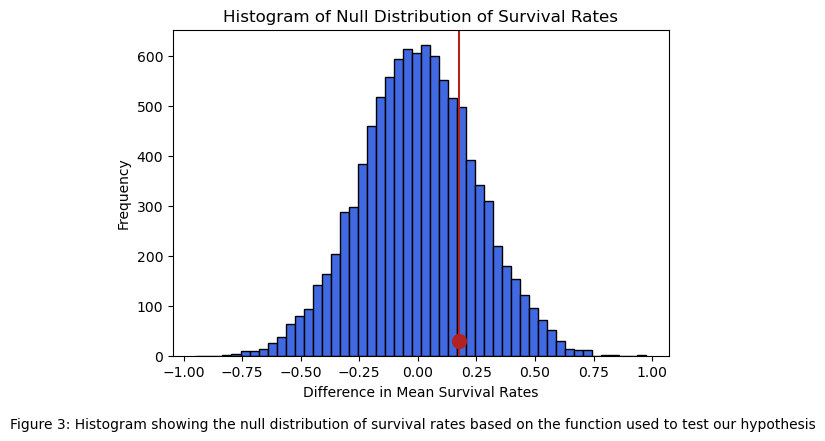

In [24]:
#Visualizing null distribution
plt.hist(null_dist, edgecolor = "black", bins = 50, color = "royalblue");
plt.axvline(obs_stat, color = "firebrick");
plt.plot(obs_stat, 30, '.', markersize = 20, color = "firebrick");
plt.xlabel("Difference in Mean Survival Rates");
plt.ylabel("Frequency");
plt.title("Histogram of Null Distribution of Survival Rates");
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.05, "Figure 3: Histogram showing the null distribution of survival rates based on the function used to test our hypothesis", 
            ha='center', fontsize=10);

In [25]:
p_value = np.mean(np.array(null_dist) >= obs_stat)
p_value

np.float64(0.238)

#### Scatterplot with Regression Line

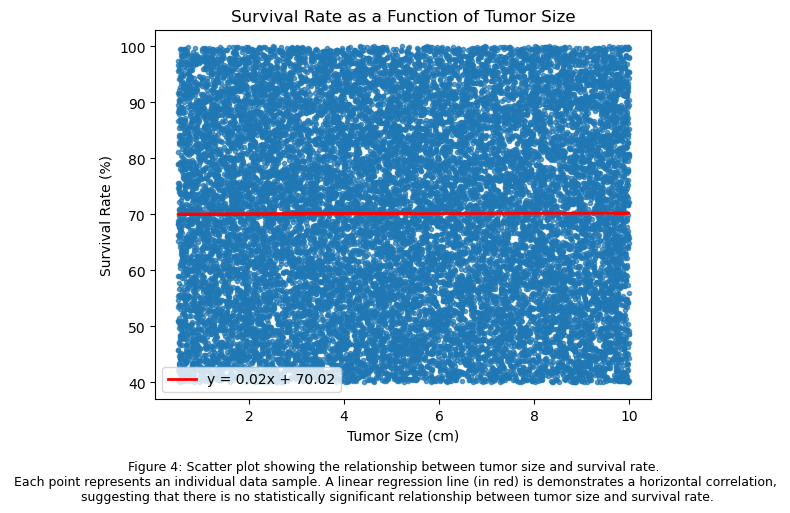

In [26]:
# Scatter plot
plt.plot(brain_tumor_dataset_1["Tumor_Size"], brain_tumor_dataset_1["Survival_Rate"], ".", alpha=0.7);

# Regression line
x = brain_tumor_dataset_1["Tumor_Size"]
y = brain_tumor_dataset_1["Survival_Rate"]
m, b = np.polyfit(x, y, 1)  # Linear regression (y = mx + b)
plt.plot(x, m*x + b, color = "red", linewidth = 2, label = f'y = {m:.2f}x + {b:.2f}')

# Labels and title
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate as a Function of Tumor Size")
plt.legend();
plt.figtext(0.5, -0.10, "Figure 4: Scatter plot showing the relationship between tumor size and survival rate. \n Each point represents an individual data sample. A linear regression line (in red) is demonstrates a horizontal correlation, \n suggesting that there is no statistically significant relationship between tumor size and survival rate.",
            ha='center', fontsize=9);

#### Descriptive Statistical Analysis

In [27]:
# Malignant 
malignant_tumor_sizes = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Malignant"]["Tumor_Size"]
tumor_sizem_Q1 = np.percentile(malignant_tumor_sizes, 25)
tumor_sizem_Q3 = np.percentile(malignant_tumor_sizes, 75)

# Benign
benign_tumor_sizes = brain_tumor_dataset_3[brain_tumor_dataset_3["Tumor_Type"] == "Benign"]["Tumor_Size"]
tumor_sizeb_Q1 = np.percentile(benign_tumor_sizes, 25)
tumor_sizeb_Q3 = np.percentile(benign_tumor_sizes, 75)

print("Mean B =", np.mean(benign_tumor_sizes), 
      "Median B =", np.median(benign_tumor_sizes))
print("Q1 B =", tumor_sizeb_Q1, "Q3 M =", tumor_sizeb_Q3)

print("Mean M =", np.mean(malignant_tumor_sizes), 
      "Median M =", np.median(malignant_tumor_sizes))
print("Q1 M =", tumor_sizem_Q1, "Q3 M =", tumor_sizem_Q3)

Mean B = 5.276205616850552 Median B = 5.27
Q1 B = 2.88 Q3 M = 7.68
Mean M = 5.197162512462613 Median M = 5.14
Q1 M = 2.8 Q3 M = 7.58


## Question 2. Relationship Between Treatment Modalities and Survival Rates

### Visualizing the data

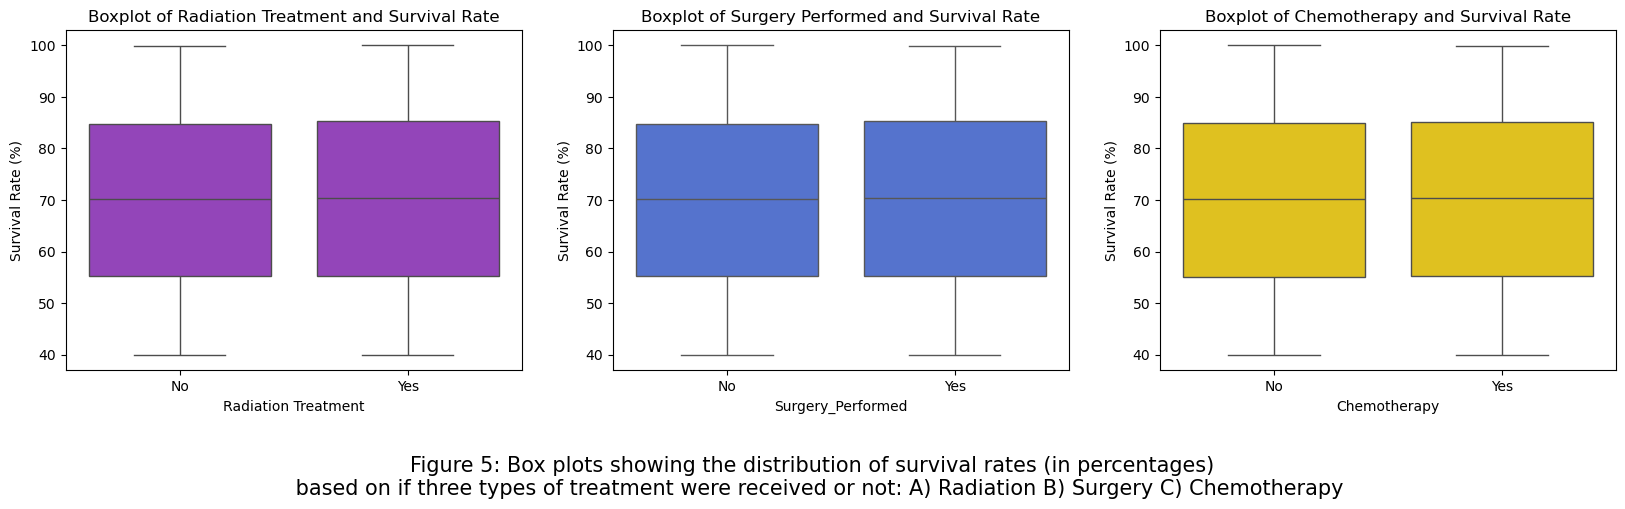

In [28]:
# Select relevant columns for question 2
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type",
"Symptom_1", "Stage", "Radiation_Treatment", "Surgery_Performed",
"Chemotherapy", "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_4 = brain_tumor_dataset_2[["Radiation_Treatment",
"Surgery_Performed", "Chemotherapy", "Survival_Rate"]].copy()
brain_tumor_dataset_4.loc[:, "Survival_Rate"] = brain_tumor_dataset_4["Survival_Rate"].round(2)

#Create boxplot for each treatment type (radiation, surgery, chemotherapy)
plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1);
sns.boxplot(data = brain_tumor_dataset_4, 
            x = "Radiation_Treatment", 
            y = "Survival_Rate", 
            color = "darkorchid");
plt.xlabel("Radiation Treatment");
plt.ylabel("Survival Rate (%)");
plt.title("Boxplot of Radiation Treatment and Survival Rate");

plt.subplot(1, 3, 2);
sns.boxplot(data = brain_tumor_dataset_4, 
            x = "Surgery_Performed",
            y = "Survival_Rate",
            color = "royalblue");
plt.xlabel("Surgery_Performed");
plt.ylabel("Survival Rate (%)");
plt.title("Boxplot of Surgery Performed and Survival Rate");

plt.subplot(1, 3, 3);
sns.boxplot(data = brain_tumor_dataset_4,
            x = "Chemotherapy",
            y = "Survival_Rate",
            color = "gold");
plt.xlabel("Chemotherapy");
plt.ylabel("Survival Rate (%)");
plt.title("Boxplot of Chemotherapy and Survival Rate");

plt.figtext(0.5, -0.05, "Figure 5: Box plots showing the distribution of survival rates (in percentages) \n based on if three types of treatment were received or not: A) Radiation B) Surgery C) Chemotherapy", 
            ha = 'center', fontsize = 15);
plt.subplots_adjust(bottom=0.2);


### Analyzing the data 

In [29]:
brain_tumor_dataset_6 = np.round(brain_tumor_dataset_4.groupby(["Radiation_Treatment", 
"Surgery_Performed", "Chemotherapy"]).agg(mean_survival_rate = ("Survival_Rate", "mean"), 
median_survival_rate = ("Survival_Rate", "median"), 
max_survival_rate = ("Survival_Rate", "max"),
min_survival_rate = ("Survival_Rate", "min")).reset_index(), 2) 

patients_with_radiation = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "Yes") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "No") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "No")]
display(patients_with_radiation)

patients_with_surgery = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "No") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "Yes") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "No")]
display(patients_with_surgery)

patients_with_chemotherapy = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "No") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "No") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "Yes")]
display(patients_with_chemotherapy)

patients_without_treatment = brain_tumor_dataset_6[
    (brain_tumor_dataset_6["Radiation_Treatment"] == "No") &
    (brain_tumor_dataset_6["Surgery_Performed"] == "No") & 
    (brain_tumor_dataset_6["Chemotherapy"] == "No")]
display(patients_without_treatment)

,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
4,Yes,No,No,69.81,69.9,100.0,40.0


,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
2,No,Yes,No,70.51,70.54,99.9,40.06


,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
1,No,No,Yes,69.68,70.05,99.99,40.01


,Radiation_Treatment,Surgery_Performed,Chemotherapy,mean_survival_rate,median_survival_rate,max_survival_rate,min_survival_rate
0,No,No,No,69.85,69.67,99.96,40.0


## Question 3. Relationship Between First Symptom and Tumor Stage

### Visualizing the data

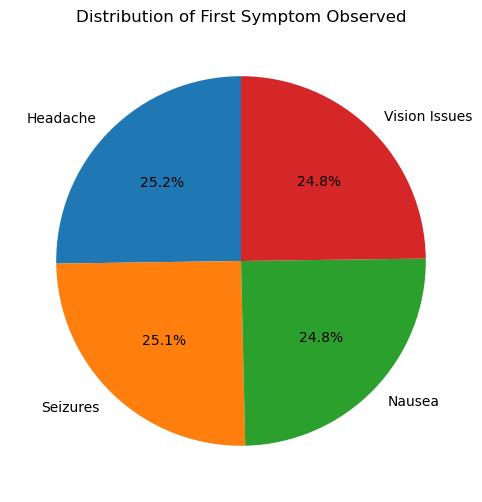

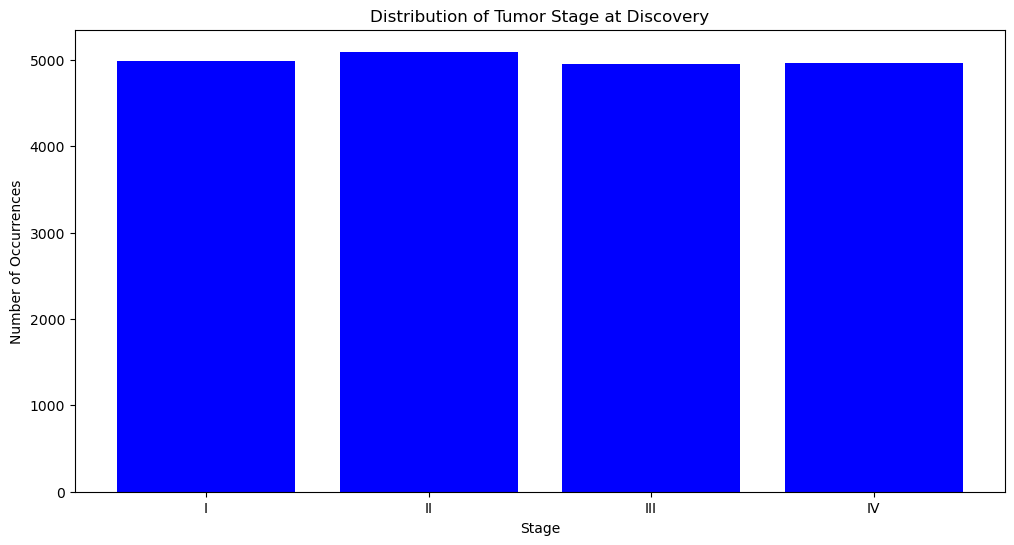

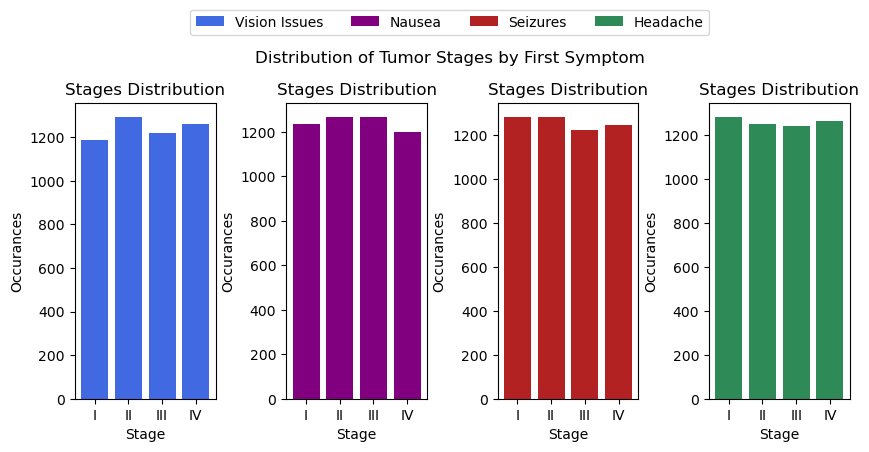

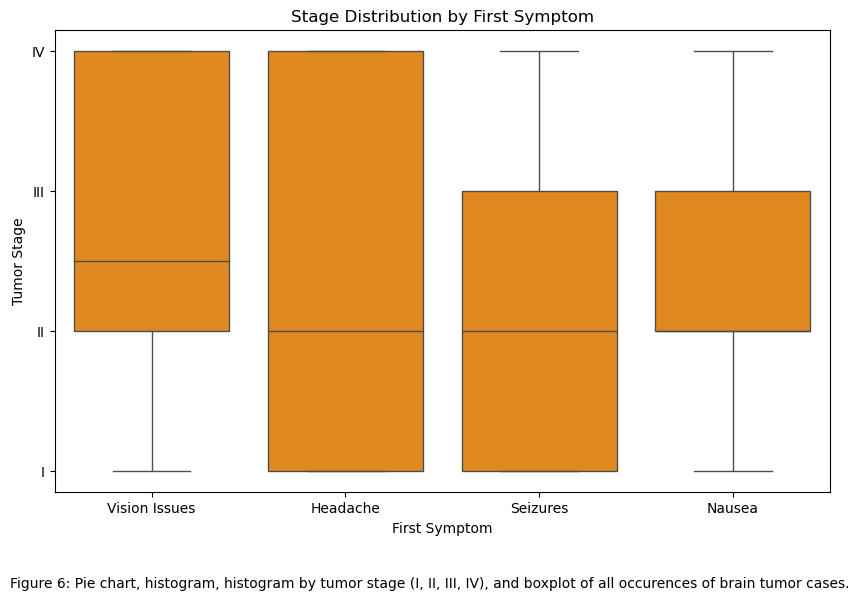

In [33]:
# Select relevant columns for question 3
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type",
"Symptom_1", "Stage", "Radiation_Treatment", "Surgery_Performed",
"Chemotherapy", "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_5 = brain_tumor_dataset_2[["Symptom_1", "Stage"]].copy()

# Plot symptom distribution pie chart
symptom1_count = brain_tumor_dataset_5["Symptom_1"].value_counts()
plt.figure(figsize = (12,6));
plt.pie(symptom1_count, 
        labels=symptom1_count.index, 
        startangle=90, 
        autopct="%1.1f%%");
plt.title("Distribution of First Symptom Observed");
plt.show();

# Plot discovery stage distribution bar graph
stage_count = brain_tumor_dataset_5["Stage"].value_counts()
correct_order = ["I", "II", "III", "IV"]
stage_count = stage_count[correct_order]
plt.figure(figsize = (12,6));
plt.bar(stage_count.index, stage_count, color="blue");
plt.title("Distribution of Tumor Stage at Discovery");
plt.xlabel("Stage");
plt.ylabel("Number of Occurrences");
plt.show();

# Plot distribution of tumor stages for each first symptom
vision_issues_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Vision Issues"]
nausea_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Nausea"]
seizures_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Seizures"]
headache_stage = brain_tumor_dataset_5[brain_tumor_dataset_5["Symptom_1"] == "Headache"]


vision_stage_count = vision_issues_stage['Stage'].value_counts().sort_index()
nausea_stage_count = nausea_stage['Stage'].value_counts().sort_index()
seizures_stage_count = seizures_stage['Stage'].value_counts().sort_index()
headache_stage_count = headache_stage['Stage'].value_counts().sort_index()

fig, axes = plt.subplots(1,4,figsize=(10,4));


axes[0].bar(vision_stage_count.index, 
            vision_stage_count, 
            color="royalblue", label="Vision Issues");
axes[0].set_title("Stages Distribution");
axes[0].set_xlabel("Stage");
axes[0].set_ylabel("Occurences");


axes[1].bar(nausea_stage_count.index, 
            nausea_stage_count, 
            color="purple", label="Nausea");
axes[1].set_title("Stages Distribution");
axes[1].set_xlabel("Stage");
axes[1].set_ylabel("Occurences");


axes[2].bar(seizures_stage_count.index, 
            seizures_stage_count, 
            color="firebrick", label="Seizures");
axes[2].set_title("Stages Distribution");
axes[2].set_xlabel("Stage");
axes[2].set_ylabel("Occurences");


axes[3].bar(headache_stage_count.index, 
            headache_stage_count, 
            color="seagreen", label="Headache");
axes[3].set_title("Stages Distribution");
axes[3].set_xlabel("Stage");
axes[3].set_ylabel("Occurences");


plt.subplots_adjust(wspace=0.5);
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=4);
plt.subplots_adjust(top=0.85);

fig.suptitle("Distribution of Tumor Stages by First Symptom")

# Visualize this distribution with a boxplot
correct_order_2 = ["IV", "III", "II", "I"]
brain_tumor_dataset_5["Stage"] = pd.Categorical(brain_tumor_dataset_5["Stage"], 
categories=correct_order_2, ordered=True)
plt.figure(figsize = (10,6));
sns.boxplot(x="Symptom_1", 
            y="Stage", 
            data= brain_tumor_dataset_5, 
            color="darkorange");
plt.title("Stage Distribution by First Symptom");
plt.xlabel("First Symptom");
plt.ylabel("Tumor Stage");

plt.figtext(0.5, -0.05, "Figure 6: Pie chart, histogram, histogram by tumor stage (I, II, III, IV), and boxplot of all occurences of brain tumor cases.",
            ha='center', fontsize=10);

#### Descriptive Statistical Analysis

In [31]:
# Descriptive Statistics
stage_map = {"I": 1, "II": 2, "III": 3, "IV": 4}
brain_tumor_dataset_5["Stage_numeric"] = brain_tumor_dataset_5["Stage"].map(stage_map)
brain_tumor_dataset_5["Stage_numeric"] = pd.to_numeric(brain_tumor_dataset_5["Stage_numeric"])

vision_issues_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Vision Issues"]
nausea_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Nausea"]
seizures_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Seizures"]
headache_stage_2 = brain_tumor_dataset_5["Stage_numeric"][brain_tumor_dataset_5["Symptom_1"] == "Headache"]

def stage_statistics(group):
    mean_stage = group.mean()
    median_stage = group.median()
    Q1_stage = group.quantile(0.25)
    Q3_stage = group.quantile(0.75)
    return pd.Series({"Mean": mean_stage, 
                      "Median": median_stage, 
                      "Q1": Q1_stage, 
                      "Q3": Q3_stage})

vision_stage_stats = stage_statistics(vision_issues_stage_2)
nausea_stage_stats = stage_statistics(nausea_stage_2)
seizures_stage_stats = stage_statistics(seizures_stage_2)
headache_stage_stats = stage_statistics(headache_stage_2)

stage_stats_df = pd.DataFrame({
    "Vision Stage Stats": vision_stage_stats,
    "Nausea Stage Stats": nausea_stage_stats,
    "Seizures Stage Stats": seizures_stage_stats,
    "Headache Stage Stats": headache_stage_stats
})

display(stage_stats_df)

,Vision Stage Stats,Nausea Stage Stats,Seizures Stage Stats,Headache Stage Stats
Mean,2.514724,2.489032,2.483294,2.493756
Median,2.500000,2.000000,2.000000,2.000000
Q1,2.000000,2.000000,1.000000,1.000000
Q3,4.000000,3.000000,3.000000,4.000000


## Discussion 

### Question 1 - Hypothesis Testing, Scatterplot with Regression Line, and Descriptive Statistical Analysis
In our pie chart, we can see that there are 10,030 malignant tumors and 9,970 benign tumors, indicating a somewhat even distribution. An even distribution between the two types without significant skewing supports the data's robustness and lack of outliers that could potentially skew the distribution. This robustness is crucial for our analysis for this question. 

The hypothesis testing revealed a p-value of 0.233, suggesting that the p-value came from the null distribution as shown in the histogram. Thus, we fail to reject the null hypothesis that the average survival rate is the same for any size tumor and conclude that there is no difference in average survival rates between small and large tumors. This conclusion was implied in the box plots visualizing the average survival rates of small vs. large tumors, as the median and the quartiles were very comparable. 

The scatter plot examining the relationship between tumor size (x-axis) and survival rate in percentage (y-axis). The plot contains a dense cloud of data points spanning tumor sizes from approximately 1 to 10 cm and survival rates ranging from roughly 40% to 100%. The most striking feature is the nearly horizontal red regression line (y = 0.02x + 70.02) cutting through the data. With a slope of just 0.02, this line indicates an extremely weak positive relationship between tumor size and survival rate. For practical purposes, this relationship is essentially flat. This represents a horizontal correlation, suggesting that no statistically significant relationship between these two variables. Despite expectations that larger tumors might correlate with poorer survival outcomes, this dataset shows no meaningful association between tumor size and survival rate.

The descriptive statistics revealed the mean, median, max, and min values of each tumor type (benign: B and malignant: M). We found that Mean B = 5.28 cm Median B = 5.27 cm, suggesting there are no extreme outliers for the benign values. For the malignant tumors we found that Mean M = 5.20cm and Median M = 5.14 cm, also suggesting there are no extreme outliers for the malignant values.

### Question 2- Descriptive Statistical Analysis
In the boxplot analysis, all three boxplots displaying the average survival rates of the different treatment modalities looked comparable, with no outliers skewing the data. The spreads for each treatment modality minimally differed, with similar medians and quartiles. Thus, there was no need to do additional data cleaning to create a more robust dataset. Comparing the descriptive statistics (pictured below) of the mean, median, max, and min values below of the survival rates with treatment and without treatment, there was no apparent trend suggesting that any one particular treatment was effective. 
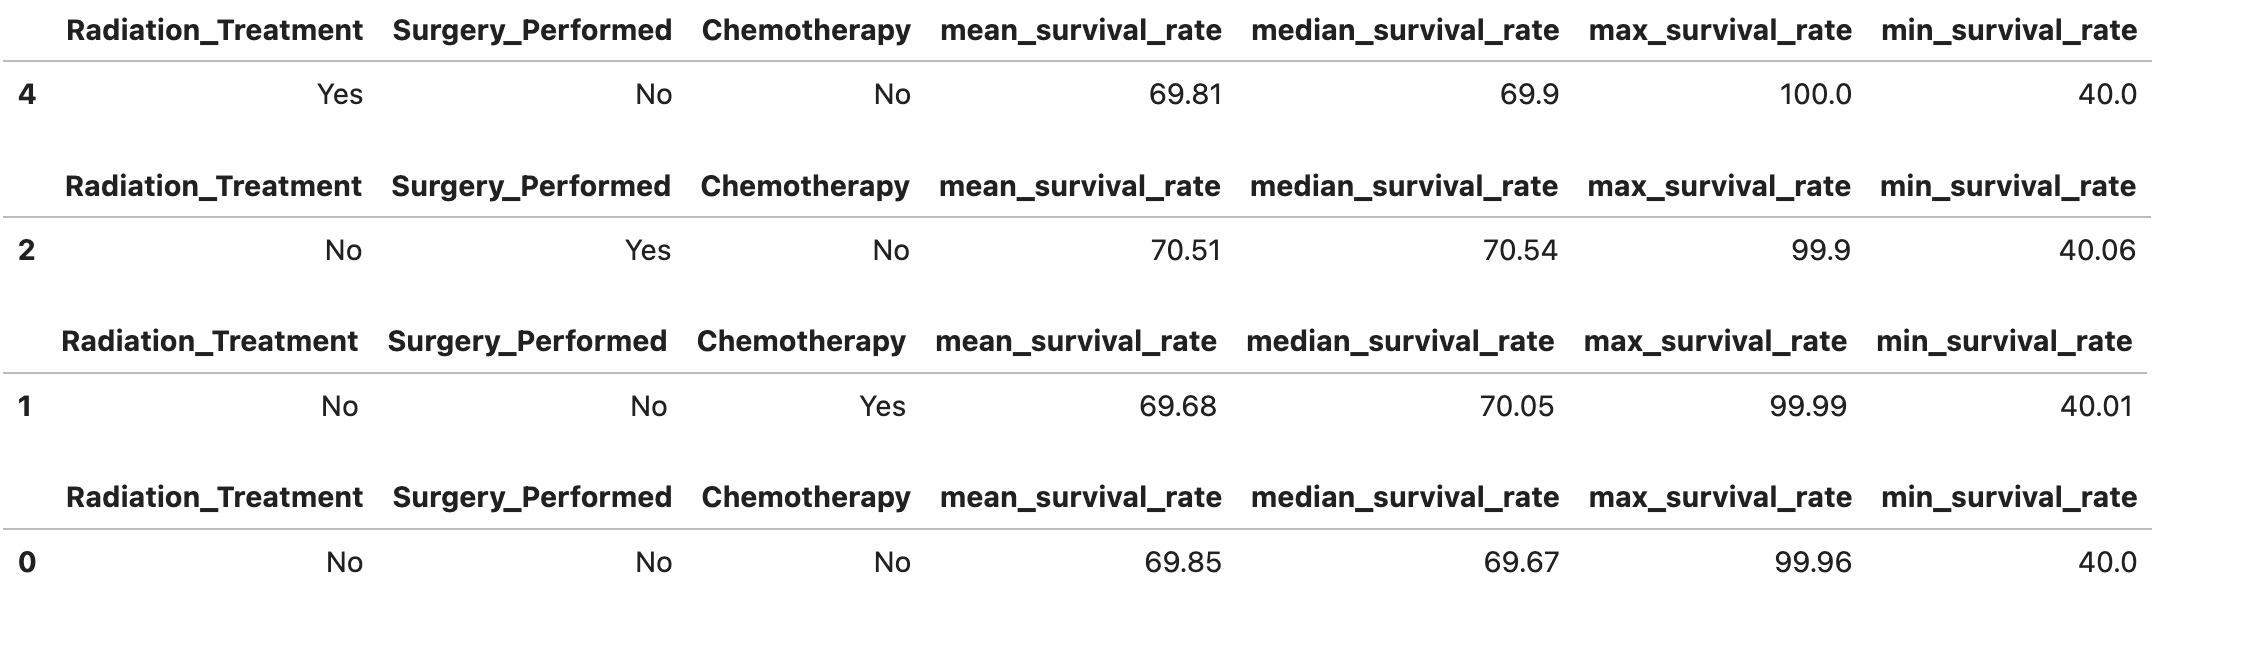

### Question 3 - Descriptive Statistical Analysis
In the bar graph subplots (second set of bar graphs), as well as the boxplot analysis, we can see that this is no indication of outliers that fall outside of and can distort analysis done on our data. Since both of the variables we considered (Tumor Stage and First Symptom) were categorical, we were searching for combinations of these variables that had extremely low frequencies. Since we didn't find any of these combinations, we did not have any outliers to remove from the data. 

When we converted the stages to numerical values in order to do descriptive statistics, we found that the stage value mean and medians for each of the first symptoms were very similar, indicating our dataset didn't contain significant outliers (or extremely uncommon combinations of first symptom and stage).

The initial pie chart of first symptoms also shows us that each of the symptoms are equally as common (somewhat even distribution), so we did not need to remove any extremely uncommon symptoms from the data. The bar graph which presents the distribution of tumor stages in our dataset, we can also see that there are no uncommon stage datapoints, as all of the stages are similarly common (somewhat even distribution). 

In the bar chart subplots, we observed a somewhat even distribution of tumor stages at discovery for each of the 4 symptoms, suggesting that no one stage is more prevalent for any of the different first symptoms. After converting the stage values to numerical values and doing descriptive statistics on the data, we observed that the mean and median stage values for the symptoms were very close to one another, suggesting that there wasn't a notable difference between the diagnosed stages of the cancer and the first observed symptom. There were some slight differences in the 1st and 3rd quartile values for the different symptoms, but we didn't draw any meaningful conclusions from this.

## Conclusions
#### Question 1
Malignant brain tumors are cancerous and tend to grow quickly and aggressively, potentially spreading to other parts of the brain, while benign brain tumors are non-cancerous and typically grow slowly and don't spread. In our analysis between "Tumor_Type" and "Tumor_Size", we found that the percent difference between the mean tumor sizes of benign and malignant tumors is approximately 1.51%. This indicates a very slight difference in the average size of tumors between the two types. The percent difference between the median tumor sizes is approximately 2.50%, also suggesting a minor difference in the central tendency of tumor sizes for the two groups. This suggests to us that tumor type alone is not representative of the size of the tumor in the brain, despite this difference in how they manifest in the brain. We also ran a hypothesis test to investigate whether larger tumors have a lower survival rate than smaller tumors, or if tumor size did not impact survival rate. After finding our observed statistic (the difference between the mean survival rates of large tumors and the mean survival rate of small tumors) and creating a null distribution to analyze this observed statistic, we calculated a p-value of 0.2391. Based on this, we determined that the observed statistic can likely be explained by chance in a null distribution, suggesting that we cannot reject our null hypothesis. This suggests to us that tumor size alone is not predictive of survival rate; rather, there are other factors, such as cancer stage and tumor growth rate, that may be necessary to consider alongside tumor size in order to make such analyses. In addition, our findings our limited due to using a simulated dataset. While the dataset is intended to cover a diverse range of scenarios and mimic real-life patient records, using simulated data designed for machine learning projects may represent different scenarios and records in a distribution that is not exactly like reality. Because we did not analyze real patient records, our findings may only be able to help us make conclusions about this particular data set, rather than conclusions about brain tumor survival rates in the real-world.   

The weak correlation revealed in the regression line of the scatter plot has important clinical implications. It challenges the assumption that tumor size alone is a reliable indicator for survival outcomes. For medical practitioners, this suggests that treatment decisions should not be based predominantly on tumor size, and a more comprehensive assessment of multiple factors is necessary for accurate prognosis and treatment planning. This suggests that other factors in this dataset that were not captured in the correlation plot itself such as tumor type, treatment modalities, or genetic markers—likely could perhaps more significant roles in determining survival rates than tumor size alone.

#### Question 2
Currently, there are several treatment options available for removing brain tumors, and treatment selection for optimizing survival rates depends on the size and severity of the tumor. To identify the best treatment, we analyzed the relationship between treatment modalities (radiation treatment, surgery, and chemotherapy) and patient survival rates. We found that the mean survival rates of patients who had received radiation treatment, surgery, or chemotherapy were comparable (69.81%, 70.51%, 69.68%, respectively). The range of the survival rates between the treatment modalities also differed minimally, with the lowest survival rate being 40% and the highest survival rate being nearly 100%. These results elucidate that no one treatment modality is more effective in treating brain tumors to increase survival outcomes in patients. It is likely that there is not a singular best treatment for removing brain tumors because doctors need to treat brain tumors on a case-by-case basis, perhaps implementing multiple treatment techniques to treat more aggressive subtypes. Interestingly, patients who did not receive any treatment displayed similar results, suggesting that survival rates may depend on other factors such as tumor size and severity.

#### Question 3
The stages (I-IV) of tumors are indicators of the severity of tumor or disease and the level to which it has metastisized. In our analysis between "Symptom_1" and "Stage", we investigated whether there was a relationship between the first presenting symptom and the stage of the tumor in the data set. We found that each of the first symptoms (Vision Issues, Nausea, Seizures, Headache) presented a similar distribution of tumor stages in the data set, with no significant differences between occurences of each stage across the four symptom types. After converting the stages to numerical values and doing descriptive statistics, we found that the mean stage values for each symptom type were all within 1.27% of each other. In addition, the median stage value for each symptom type was within the range 2.0 - 2.5, falling close to the average median value (2.4952015). This indicates that there was very little difference in the occurence of the different stages based on what symptom was presented first. These findings suggest to us that there is no signficant relationship between first symptom presented and the stage, meaning that they are not predictive of each other. Rather, other factors--such as tumor type, tumor size, tumor growth rate, and age--may be necessary to use in conjuction with first symptoms to draw conclusions or make predictions about cancer stage. In addition, our findings our limited due to using a simulated dataset. While the dataset is intended to cover a diverse range of scenarios and mimic real-life patient records, using simulated data designed for machine learning projects may represent different scenarios and records in a distribution that is not exactly like reality. Because we did not analyze real patient records, our findings may only be able to help us make conclusions about this particular data set, rather than conclusions about the relationship between symptoms and cancer stages in the real-world.  

## Reflection
  
As three neuroscience majors, we were excited to have the chance to analyze this dataset related to brain tumors, as they are an interest we all have in common. We were curious about the relationship between different characteristics of the tumor or illness, such as survival rates, stages, sizes, symptoms, and treatment types. Overall, the project took us around 30 hours to complete. One of difficulties we faced was determining how best to represent and analyze data that has so many confounding variables. In addition, we found it difficult to analyze real trends due to the fact that we were using a simulated data set. 

We originally divided the 3 questions amongst the 3 of us: Vivian completed most of question 1, Hannah completed most of question 2, and Lea completed most of question 3. After the initial draft, all three members contributed revisions to each of the questions. Hannah aded the hypothesis testing and Vivian added the regression analysis for question 1. Vivian and Lea both fixed typos and made data visualizations clearer with added captions and quantity labels, and revising other small mistakes from the draft. 

In addition, each group member contributed to each of the three conclusions, the introduction, the data cleaning, and the reflection. Across our three peer reviews, we recieved suggestions to strengthen our analysis by including some form of statistical analysis other than descriptive statistics, clean up our visualizations and written typos, add captions to make our graphs clearer, add limitations to our conclusions, address the applicability of our findings for the real world, make the graph colors easier to see and understand, and add contributions made by each group member. We implemented thee revisions by adding hypothesis testing and regression analysis to the analysis and conclusion of our Q1, adding percentages to our pie charts, changing the colors of the graphs to be brighter and easier to read, re-reading our writing and fixing spelling errors or other typos, discussing the limitations of a simulated data set in our conclusion, discussing our limited ability to draw conclusions about real-life trends do to the simulated nature of our data set, and clearly stating what contributions were made by each group member.

## Appendix: Data Cleaning and Peer Review Revisions


#### Peer Review 1 - Tiffany O. Original: (89/90)
*Build  out the analysis conclusions just a bit further. It might be worth reflecting on what that could suggest about the datasetʼs limitations or possible confounding factors (like severity or type of tumor). Add a short paragraph addressing why survival rates may not vary much between treatment and non-treatment groups—this could show your awareness of confounding variables or the limits of the dataset. However, overall the project is very descriptive. Fix small typos and formatting in the final writeup (“occurances” to “occurrences” and “symptomns” to “symptoms”). Some repeated or cluttered code could be cleaned up for readability.* 

To address this, we elaborated further on the types of analyses we could use and reflect more on the dataset's limitations (synthetic data). We also revised the mentioned typos throughout the project. We moved code to the appendix to improve readibility. 

#### Peer Review 2 - Ryan C. Original: (85/90)
*Introduction could be strengthened by briefly referencing other analyses or related work examining similar real or synthetic brain tumor datasets. Analysis might benefit from additional formal statistical testing (e.g., t-tests, ANOVA, regression) to add depth beyond descriptive findings. Opportunities for more thorough discussions around color choices and labeling on the graphs, as well as exploring alternative visualizations (for instance, histograms or correlation plots) that might further expand on relationships in the data. In the Introduction, briefly mention whether any similar analyses or studies have been performed on brain tumor data (real or synthetic) to better contextualize the work. Include a brief statistical test: For instance, a t-test comparing tumor sizes across benign vs. malignant tumors, or a short logistic regression for factors affecting survival. This would add depth beyond descriptive comparisons. Refine some of the plots and consider short captions. Some readers might find certain pastel colors or overlapping color schemes hard to distinguish.  Consider briefly mentioning how you chose them or ensuring that they are visually distinct. Check for small typos or spacing.* 

To address this, we incorprated a correlation plot and hypothesis testing to increate variation in our statistical analysis. We added percentages to our all of our graphs and labeled the with consistency. We referred to previous literature on brain tumors for Question 1 to add validity to our hypothesis test. We also revised the colros from light pastels to brighter, vibrant colors to improve readability. We fixed the mentioned typos throughout the project. 

#### Peer Review 3 - Garon D. Original: (91/97)
*Discussion could be strengthened – consider why treatments might not vary in effectiveness in synthetic data, reflect on limitations of simulated datasets more explicitly. Some plots (like the pie charts) could benefit from more explicit quantitative annotations (e.g., percentages or counts). Clarify in the conclusion whether findings could inform real-world diagnosis or treatment or are limited to this dataset. Strong visualizations, though some are difficult to interpret → add explicit quantitative annotations. More statistical testing to validate claims would help (ex. p tests). Code is generally readable but could use more comments. Summarizes findings, but the insight is limited by the lack of statistical testing and doesnʼt address limitations fully. Reflection is present but incomplete. Missing detailed self-assessment and time estimate. Also add a discussion of the contributions made by each team member.* 

We strengthened our discussion more explicitly addressing the limitations of simulated datasets. We improved visualizations by adding quantitative annotations (percentages and counts) to pie charts and other figures to enhance interpretability. We implemented statistical testing (p-tests) to validate our claims and added more comprehensive comments throughout our code. Our conclusion now clearly articulates whether findings could inform real-world diagnosis or are limited to this specific dataset. We expanded our reflection section to include a more thorough self-assessment and added time estimates for the project. Finally, we included a detailed breakdown of each team member's contributions to provide transparency about our collaborative process.

In [36]:
# Loading dataset 
brain_tumor_dataset = pd.read_csv("brain_tumor_dataset.csv")
brain_tumor_dataset.head()

# Creating new dataset with relevant variables 
brain_tumor_dataset_1 = brain_tumor_dataset.copy()
brain_tumor_dataset_2 = brain_tumor_dataset_1[["Tumor_Size", "Tumor_Type",
"Symptom_1", "Stage", "Radiation_Treatment", "Surgery_Performed",
"Chemotherapy", "Survival_Rate", "Gender", "MRI_Result"]].copy()
brain_tumor_dataset_2.head()
brain_tumor_dataset_2.loc[:, "Tumor_Size"] = brain_tumor_dataset_2["Tumor_Size"].round(2)

#Display(brain_tumor_dataset_3.reset_index())
brain_tumor_dataset_2.loc[:, "Stage"] = brain_tumor_dataset_2["Stage"].replace({"I": 1, "II": 2, "III": 3, "IV": 4}).astype(int)
brain_tumor_dataset_2.loc[:, "Gender"] = brain_tumor_dataset_2["Gender"].replace({"Male": 1, "Female": 2}).astype(int)
brain_tumor_dataset_2.loc[:, "MRI_Result"] = brain_tumor_dataset_2["MRI_Result"].replace({"Negative": 0, "Positive": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Radiation_Treatment"] = brain_tumor_dataset_2["Radiation_Treatment"].replace({"No": 0, "Yes": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Surgery_Performed"] = brain_tumor_dataset_2["Surgery_Performed"].replace({"No": 0, "Yes": 1}).astype(int)
brain_tumor_dataset_2.loc[:, "Chemotherapy"] = brain_tumor_dataset_2["Chemotherapy"].replace({"No": 0, "Yes": 1}).astype(int)

display(brain_tumor_dataset_2)

/tmp/ipykernel_3641562/2896473369.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  brain_tumor_dataset_2.loc[:, "Stage"] = brain_tumor_dataset_2["Stage"].replace({"I": 1, "II": 2, "III": 3, "IV": 4}).astype(int)
/tmp/ipykernel_3641562/2896473369.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  brain_tumor_dataset_2.loc[:, "Gender"] = brain_tumor_dataset_2["Gender"].replace({"Male": 1, "Female": 2}).astype(int)
/tmp/ipykernel_3641562/2896473369.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

,Tumor_Size,Tumor_Type,Symptom_1,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Gender,MRI_Result
0,5.38,Malignant,Vision Issues,3,0,0,0,51.312579,1,1
1,4.85,Benign,Headache,2,1,1,1,46.373273,1,1
2,5.59,Benign,Vision Issues,1,0,0,0,47.072221,1,0
3,1.44,Malignant,Vision Issues,4,1,0,1,51.853634,1,0
4,2.42,Benign,Headache,1,0,0,1,54.708987,2,1
...,...,...,...,...,...,...,...,...,...,...
19995,9.61,Malignant,Seizures,3,0,0,1,58.229662,1,0
19996,1.54,Benign,Headache,3,1,1,0,77.706856,2,1
19997,3.62,Benign,Seizures,1,0,0,1,89.543803,2,1
19998,8.52,Malignant,Seizures,3,1,1,1,83.306781,1,1
